In [1]:
from ase.build import molecule


from ase.io import read
from ase.visualize import view
from math import *
from ase.constraints import FixInternals
import numpy as np

import torchani
model = torchani.models.ANI1x().double()
from ase.optimize import BFGS

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ethan = molecule('C2H6')

In [ ]:
# ethan.set_dihedral(5,1,0,2,angle=360,indices=[2,3,4])

In [6]:
ethan.get_dihedral(5,1,0,2)

180.0

In [ ]:
view(ethan)

In [4]:
ethan.set_calculator(model.ase())

In [5]:
BFGS(ethan).run(fmax=0.0001)

      Step     Time          Energy         fmax
BFGS:    0 16:33:38    -2171.504590        0.0389
BFGS:    1 16:33:38    -2171.504680        0.0233
BFGS:    2 16:33:38    -2171.504770        0.0123
BFGS:    3 16:33:38    -2171.504785        0.0115
BFGS:    4 16:33:38    -2171.504824        0.0063
BFGS:    5 16:33:38    -2171.504829        0.0022
BFGS:    6 16:33:38    -2171.504830        0.0002
BFGS:    7 16:33:38    -2171.504830        0.0000


True

In [7]:
dihedral_indices1 = [5,1,0,2]
En=[]

for i in [180,120,60,0,60,120,180]:
    ethan.set_dihedral(5,1,0,2,angle=i,indices=[2,3,4])
    dihedral1 = [np.deg2rad(i), dihedral_indices1]
    ethan.set_constraint(FixInternals(dihedrals=[dihedral1]))
    BFGS(atoms=ethan,maxstep=0.04).run(fmax=0.0001,steps=1000)
    En.append(ethan.get_potential_energy())

      Step     Time          Energy         fmax
BFGS:    0 16:33:52    -2171.504830        0.0000
      Step     Time          Energy         fmax
BFGS:    0 16:33:52    -2171.360878        0.2506
BFGS:    1 16:33:52    -2171.362287        0.0866
BFGS:    2 16:33:52    -2171.363183        0.0770
BFGS:    3 16:33:52    -2171.364844        0.1050
BFGS:    4 16:33:52    -2171.365163        0.0540
BFGS:    5 16:33:53    -2171.365293        0.0171
BFGS:    6 16:33:53    -2171.365320        0.0081
BFGS:    7 16:33:53    -2171.365324        0.0034
BFGS:    8 16:33:53    -2171.365325        0.0005
BFGS:    9 16:33:53    -2171.365325        0.0000
      Step     Time          Energy         fmax
BFGS:    0 16:33:53    -2171.500531        0.2424
BFGS:    1 16:33:53    -2171.501850        0.0821
BFGS:    2 16:33:53    -2171.502666        0.0761
BFGS:    3 16:33:53    -2171.504315        0.1289
BFGS:    4 16:33:53    -2171.504695        0.0621
BFGS:    5 16:33:53    -2171.504805        0.0152
BFG

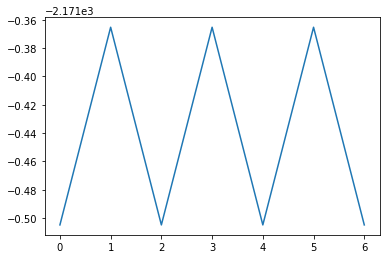

In [16]:
plt.plot(range(7),En)